In [1]:
import matplotlib.pyplot as plt 
from scipy import stats
import numpy as np
import pandas as pd
from datetime import datetime 
import netCDF4
import xarray as xr

exploring mms data

good help: https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/

In [2]:
# # using NETCDF4

# data_floc = 'mms-data' # directory for data file location
# data_fname = 'mms1_imef_srvy_l2_5sec_20150901000000_20190101000000' # file name
# dfile = data_floc+'/'+data_fname+'.nc' # complete path to file

# # get dataset
# mms_dat1 = netCDF4.Dataset(dfile)   # NETCDF4
# # mms_dat1 = xr.open_dataset(dfile) # xarray

# # print vars
# print(mms_dat1.variables.keys()) # NETCDF4
# # mms_dat1.data_vars # xarray

# # individually acces var
# e = mms_dat1.variables['E_EDP'] 
# t = mms_dat1.variables['time'] 

# # get shape, dimension of variable
# print(e.dimensions)
# print(e.shape)

# # pull values from variable
# e = mms_dat1.variables['E_EDI'][:]
# print(e)


In [3]:
# locate data
data_floc = 'mms-data' # directory for data file location
data_fname = 'mms1_imef_srvy_l2_5sec_20150901000000_20190101000000' # file name
dfile = data_floc+'/'+data_fname+'.nc' # complete path to file

# read dataset
dat = xr.open_dataset(dfile)

# retrieve EDP
#e = dat["E_EDP"]

t = dat['time'].values

# get start date in short format
t0 = pd.to_datetime(t[0]).strftime('%m/%d/%Y')

# get end date in short format
tf = pd.to_datetime(t[-1]).strftime('%m/%d/%Y')

# check
print(f" data start: {t0}, data end: {tf}")


 data start: 09/01/2015, data end: 12/31/2018


In [4]:

edp = dat['E_EDP'][:,:,0].drop(['cart',]).rename({'E_index': 'cart'}).assign_coords({'cart': ['x', 'y', 'z']})
edi = dat['E_EDI']
dis = dat['E_DIS']
des = dat['E_DES']


# # pull values
# e = e.loc[:,'x'].values
# # remove values greater than +/-1000 [mV/m]
# e[abs(e) >= 1000] = np.nan
# # plots
#e.loc[:,'x'].plot()
#plt.plot(t,ex)



In [5]:

def plot_efield_overview(ax, edat, t):
    
    instr_name = str(edat.name[-3:7]) # instrument name
    instr_ltX = "$E_{"+instr_name+"}$"
    
    ex = edat.loc[:,'x'].values
    ey = edat.loc[:,'y'].values
    ez = edat.loc[:,'z'].values
    
    for arr in [ex,ey,ez]:
        arr[abs(arr) >= 1000] = np.nan
    
    ax.plot(t,ex, c='r', linewidth=1, label='$E_x$')
    ax.plot(t,ey, c='g', linewidth=1, label='$E_y$')
    ax.plot(t,ez, c='b', linewidth=1, label='$E_z$')
    ax.set_ylabel(f"{instr_ltX} [mV/m]")
    
    # 
    # ax.set_xticks(ax.get_xticks())
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    
    leg = ax.legend(bbox_to_anchor=(1, 1))
        
    
    
#fig, ax = plt.subplots(1, 1)
#fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=400)

#plot_efield_overview(ax,edi,t)

    


In [11]:
fig, ax = plt.subplots(4, sharex=True, figsize=(8, 10))
fig.tight_layout()
# fig.suptitle(f'Overview of {sdate} Storm')
plot_efield_overview(ax[0],edi,t)
plot_efield_overview(ax[1],edp,t)
plot_efield_overview(ax[2],dis,t)
plot_efield_overview(ax[3],des,t)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    


KeyboardInterrupt: 

Comparison of electric field values for the EDI and DIS MMS intruments from 09/01/2015 to 12/31/2018. E-field values in units [mV/m].


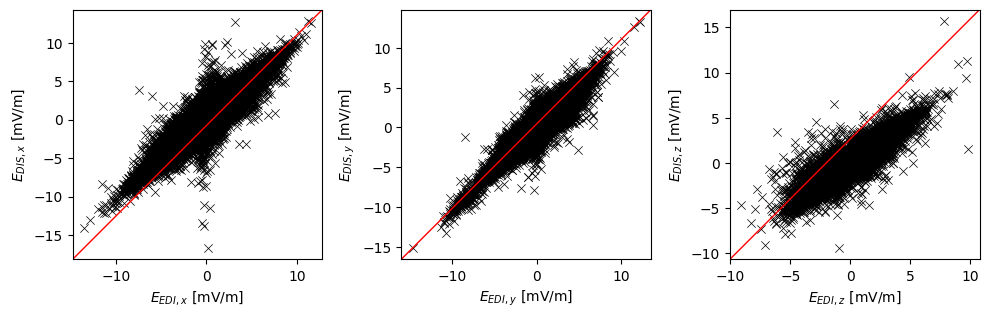

In [7]:

def plot_efield_comp(axs, ef1, ef2):
    
    instr1 = "$E_{"+str(ef1.name[-3:7])+"}$" # instrument 1 name
    instr2 = "$E_{"+str(ef2.name[-3:7])+"}$" # instrument 2 name
    
    # get coordinates
    ef1_coord = [ef1.loc[:,'x'].values, ef1.loc[:,'y'].values, ef1.loc[:,'z'].values]
    ef2_coord = [ef2.loc[:,'x'].values, ef2.loc[:,'y'].values, ef2.loc[:,'z'].values]
    coord = ['x','y','z']
    
    # remove outliers
    for arr in ef1_coord:
        arr[abs(arr) >= 1000] = np.nan
        
    for arr in ef2_coord:
        arr[abs(arr) >= 1000] = np.nan
    
    # scatter plot: efield comparison
    for i in range(0,3):
        axs[i].scatter(ef1_coord[i], ef2_coord[i], marker='x',color='k',linewidths=0.5)
        axs[i].set_xlabel(f"{instr1}$_{{,{coord[i]}}}$ [mV/m]")
        axs[i].set_ylabel(f"{instr2}$_{{,{coord[i]}}}$ [mV/m]")
    
    # old
    # axs[0].scatter(e1x, e2x, marker='x',color='k',linewidths=0.5)
    # axs[0].set_xlabel(f"{instr1}$_{{,x}}$ [mV/m]")
    # axs[0].set_ylabel(f"{instr2}$_{{,x}}$ [mV/m]")

    # identity line
    for ax in axs:
        ax.plot([0,1],[0,1], color='r', linewidth=1, alpha=1, transform=ax.transAxes)
        
        
    # get square plots
    for ax in axs:
        ax.set_box_aspect(1)

    # alternative, makes line start/stop just before end of plot
    # for ax in axs:
    #     lims = [
    #     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    #     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    #     ]

    #     # identity line
    #     ax.plot(lims, lims, 'r-', alpha=0.75, zorder=0)
    
    # print caption
    t = ef1['time'].values
    t0 = pd.to_datetime(t[0]).strftime('%m/%d/%Y')
    tf = pd.to_datetime(t[-1]).strftime('%m/%d/%Y')
    print(f"Comparison of electric field values for the {ef1.name[-3:7]} and {ef2.name[-3:7]} MMS intruments from {t0} to {tf}. E-field values in units [mV/m]." )


fig, axs = plt.subplots(1,3, figsize=(10,10))

plot_efield_comp(axs, edi, dis)


fig.tight_layout()

In [9]:
data_floc = 'mms-data' # directory for data file location
data_fname = 'mms1_imef_srvy_l2_5sec_20150901000000_20190101000000'
dfile = data_floc+'/'+data_fname+'.nc'

# get dataset
mms_dat1 = netCDF4.Dataset(dfile)   # NETCDF4
# mms_dat1 = xr.open_dataset(dfile) # xarray

# print vars
print(mms_dat1.variables.keys()) # NETCDF4
# mms_dat1.data_vars # xarray

# individually acces var
e_edp = mms_dat1.variables['E_EDP'] 
# print(e_edp)

# # get shape, dimension of variable
# print(e_edp.dimensions)
# print(e_edp.shape)

e_arr = e_edp[:].data
e_arr


dict_keys(['AE', 'AL', 'AU', 'B_GSE', 'B_index', 'Dst', 'E_DES', 'E_DIS', 'E_EDI', 'E_EDP', 'E_con', 'E_cor', 'E_index', 'E_sc', 'IEF', 'Kp', 'L', 'MLAT', 'MLT', 'R_sc', 'Scpot', 'Sym-H', 'V_drift_GSE', 'V_sc', 'cart', 'dt_minus', 'dt_plus', 'time'])


array([[[        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       [[        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       [[ 0.25445399,  0.25445399,  0.25445399],
        [ 1.33254493,  1.33254493,  1.33254493],
        [-2.99120302, -2.99120302, -2.99120302]],

       ...,

       [[        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       [[        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       [[        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]]])